In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [32]:
img = cv2.imread('../DATA/car_plate.jpg')

In [33]:
def display(img):
    fig= plt.figure(figsize=(12, 10))
    ax= fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

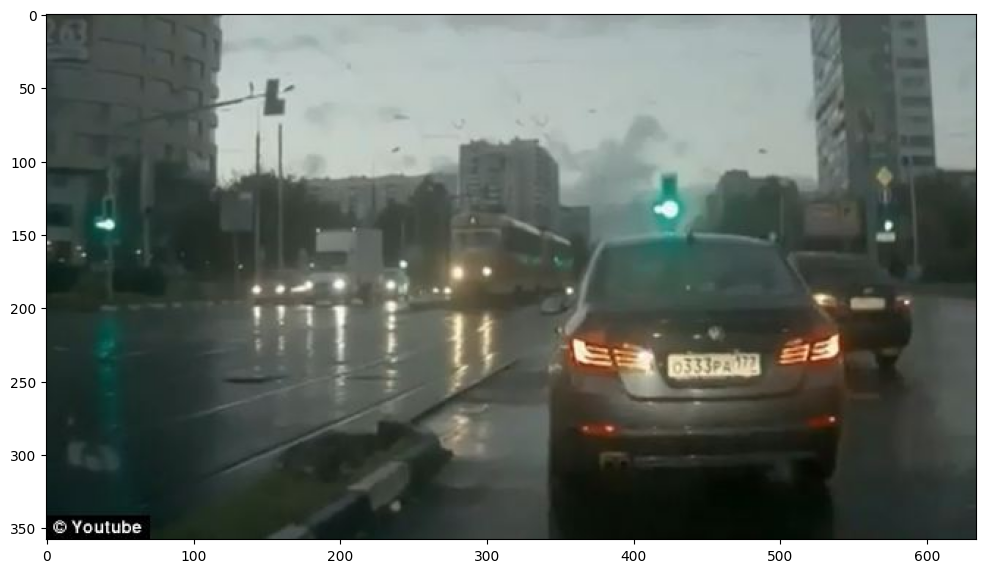

In [34]:
display(img)

In [35]:
plate_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [36]:
def locate_plate():
    plate_copy = img.copy()
    rects = plate_cascade.detectMultiScale(plate_copy, 1.2, 5)
    
    for (x,y,w,h) in rects:
        cv2.rectangle(plate_copy, (x,y), (x+w, y+h), (255,255,255), 2)
        
    return plate_copy

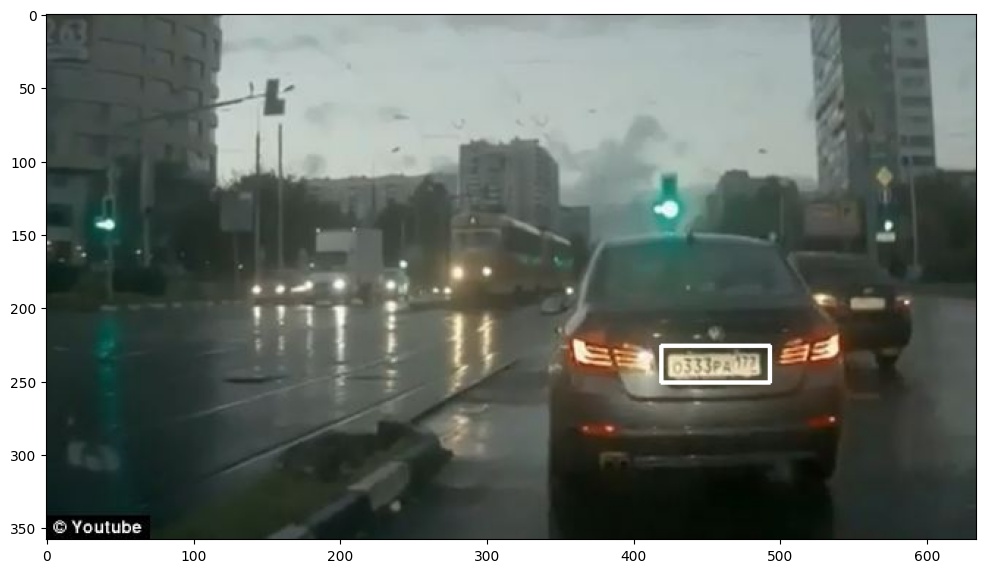

In [37]:
result = locate_plate()
display(result)

In [44]:
def detect_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    
    rects = plate_cascade.detectMultiScale(plate_img, 1.2, 5)
    
    for (x,y,w,h) in rects:
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 7)
        
        plate_img[y:y+h, x:x+w] = blurred_roi
        
    return plate_img

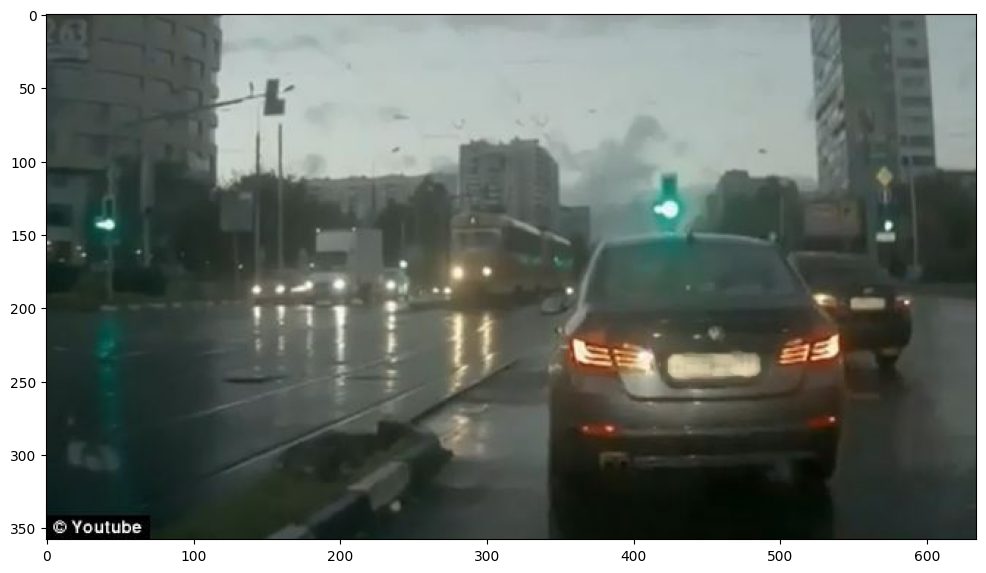

In [45]:
result = detect_blur_plate(img)
display(result)